# QLSC612 Assignment, BrainHack Summer School, May 2020

## Introduction
This notebook is part of the BrainHack QLSC6112 course and was designed to demonstrate how researchers can produce false positives or inflated prediction rates via p-hacking. Here, we perform hypothesis-driven statistical analyses to confirm a relationship we are so sure exists. Thus, we currate the data until we find this specific significant association between our variables.

In [1]:
## Import necessary libraries/packages
## stats for statistical test, matplot lib & seaborn library to make nice looking plots for visualization
import statsmodels.formula.api as smf
from pandas import plotting as pdplt
from scipy.stats import spearmanr
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data and read the CSV file. Be sure to change path to where you cloned the repository.
csvfile = ('data/brainsize.csv')
data = pd.read_csv(csvfile, sep=';', index_col=0)


We will first look at our data set which is composed of (n-40) individuals and includes the following variables: gender, 3 intelligence quotient measures (i.e. Full scale IQ (FSIQ), Performance IQ (PIQ), and Verbal IQ (VIQ), as well as measures of height, weight and brain size (MRI_Count).


In [2]:
#Check the type of data, how it is stored, check the shape and columns and check the first 5 rows
print('Data type : ', type(data))
print("Stored values:", type(data.values))
data.values[:5]
print('data.shape: ', data.shape)
print('data.columns: ',data.columns)
data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Stored values: <class 'numpy.ndarray'>
data.shape:  (40, 7)
data.columns:  Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


To prepare our data for analyses, we will specify missing values.

In [3]:
#Lets specify missing values for weight and height 
data = pd.read_csv(csvfile, sep=';', na_values=".")

# #Change the gender column from a string (Female or Male) to an integer (1 or 2)
# gender = {'Male': 1,'Female': 2} 
# data.Gender = [gender[item] for item in data.Gender] 

# Lets check an example in the second row to make sure we now read NaN for missing values
data.head(3)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437


Next, we will generate our new variables (partY and partY2), add them to the data frame, plot all variables and check the main statistics including the mean and standard deviation.

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01,40.000000,40.000000
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05,0.442166,0.382101
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04,0.295873,0.266364
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05,0.059537,0.002424
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05,0.184584,0.203219
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05,0.325623,0.356943
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05,0.672461,0.498900
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06,0.974966,0.997871


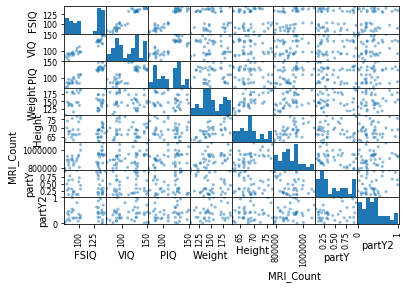

In [4]:
#Generate a new variable (named partY) of random noise
partY = [0.768859, 0.60486561, 0.15325245, 0.66189752, 0.89810853, 0.11422123, 0.31119881, 0.20650689, 0.05953708, 0.10369902, 0.83617412, 0.21907312, 0.46062318, 0.16459764, 0.11475662, 0.32602877, 0.1862892, 0.56405248, 0.70415234, 0.48521105, 0.11239133, 0.9749657, 0.92001053, 0.24164227, 0.23319068, 0.33785921, 0.76831297, 0.30354785, 0.92978203, 0.92112873, 0.17946731, 0.94350679, 0.43987106, 0.15146802, 0.62006774, 0.32521727, 0.12059762, 0.31409227, 0.2695788, 0.63683474] 

#Add variable partY to the existing brainsize.csv dataset.
df=pd.DataFrame(data)
df['partY']=partY
#print(df)

#Generate a second new  variable (named partY2) of random noise 
partY2 = [0.60461387, 0.03476205, 0.50915241, 0.85357779, 0.93385739, 0.08269333, 0.39313068, 0.20427569, 0.54949987, 0.43341312, 0.229072, 0.69993817, 0.99787148, 0.13652784, 0.20812236, 0.17196096, 0.40343073, 0.34837977, 0.21046515, 0.11259314, 0.32378094, 0.78866602, 0.23102371, 0.0024239, 0.49548205, 0.33161719, 0.09306875, 0.20674004, 0.02591862, 0.62301725, 0.07961433, 0.40098676, 0.30038796, 0.20005093, 0.46202719, 0.36550646, 0.42730613, 0.43085197, 0.39046564, 0.98777078]

#Add variable partY2 to the existing brainsize.csv dataset.
df=pd.DataFrame(data)
df['partY2']=partY2
#print(df)

#This command was originally used to create the random variable. Here, it is commented out so as to not create a new random variable when you run the code again
#First variable:
#ran_floats = np.random.rand (40,1)
#partY = ran_floats
# For second variable"
# ran_floats = np.random.rand (40,1)
# partY2 = ran_floats
# print(partY2)

#Lets plot all variables to get a first idea
pdplt.scatter_matrix(data[['FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count', 'partY', 'partY2']]);

#Lets look at the main stats for our variables (including the new variable partY)
data.describe()

We will now check the distribution of Performance IQ.

NormaltestResult(statistic=11.681588179999903, pvalue=0.002906533659856713)

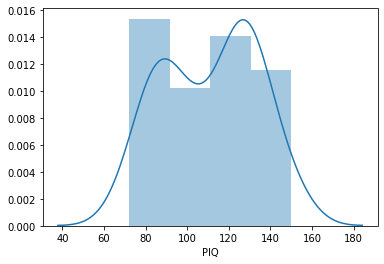

In [5]:
# Check the distribution of the PIQ score
sns.distplot(data['PIQ'])
stats.normaltest(data['PIQ'])

After removing participants who have missing data for height and weight, we will calculate the Body Mass Index (BMI), add it to our data set and check the BMI distribution.

In [6]:
# Remove participants with missing data for BMI calculation
data = data.drop([1,20], axis=0)
#print(data)

# Calculate BMI indexe with the height and weight variable
#BMI Formula: weight (lb) / [height (in)]2 x 703
BMI =  data['Weight']/data['Height']/data['Height']*703
#print(BMI)

#Add new BMI variable to the data frame
df=pd.DataFrame(data)
df['BMI']=BMI
#print(df)

# Check the distribution of BMI 
#sns.distplot(BMI)
stats.normaltest(BMI)

NormaltestResult(statistic=4.623344498151376, pvalue=0.0990954007340673)

We will now check the initial relationship between BMI and brain size as well as with PIQ, respectively.

In [7]:
# As the distribution for both variables are not normal, we will use the spearman correlation
#Spearman's correlation coefficient for non gaussian variables
corr, _ = spearmanr(data['BMI'], data['MRI_Count'])
print(corr, _)
corr, _ = spearmanr(data['BMI'], data['PIQ'])
print(corr, _)

# #Plot brain size as a function of BMI
# plt.figure(2)
# plt.subplot(1,2,1)
# sns.regplot(data['BMI'], data['MRI_Count'])

# # Plot PIQ as a function of BMI.
# plt.subplot(1,2,2)
# sns.regplot(data['BMI'], data['PIQ'])
# plt.subplots_adjust(left=0.1, right=1.5)


0.25957540098523474 0.1155360517456729
0.17731995090032088 0.2868634621102736


We will now decide the threshold for including socially active people (partY score)

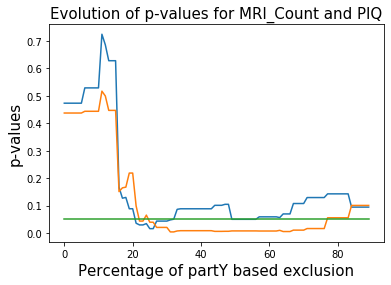

In [8]:
#We decided to exclude non-partY people. But what's the threshold for low-partY?
#partY<20% ? partY<50% ?
#Lets check what is the best threshold to define a low vs high partY score, for partY based exclusion to be most effective for both PIQ and MRI_Count.
pval=np.zeros((90,3))
thresh=np.zeros((90,1))

for i in range(0, 90):
    pval[i,0]=i
    thresh[i]=0.05
    datakeep1=data[data['partY']<1-0/100] #1-i/100
    datakeep=datakeep1[datakeep1['partY']>i/100]

    model = smf.ols('BMI ~ '+ 'PIQ', data=datakeep).fit()
    fres = model.pvalues
    pval[i,1]=(fres['PIQ'])

    model2 = smf.ols('BMI ~ '+ 'MRI_Count', data=datakeep).fit()
    fres = model2.pvalues
    pval[i,2]=(fres['MRI_Count'])

# Lets plot the evoluton of p-values for both variables along the choice of the partY threshold.  
plt.figure(2)
plt.title( 'Evolution of p-values for MRI_Count and PIQ', fontsize=15)
plt.xlabel('Percentage of partY based exclusion', fontsize=15)
plt.ylabel('p-values', fontsize=15)
plt.plot(pval[:,1])
plt.plot(pval[:,2])
plt.plot(thresh)
plt.show()
#print(pval)


Threshold of 25% gives significant results for both variables

# Results of the study.

OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     6.849
Date:                Sat, 30 May 2020   Prob (F-statistic):             0.0157
Time:                        22:48:07   Log-Likelihood:                -51.722
No. Observations:                  24   AIC:                             107.4
Df Residuals:                      22   BIC:                             109.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0243      2.263      7.524      0.000      12.332      21.717
P

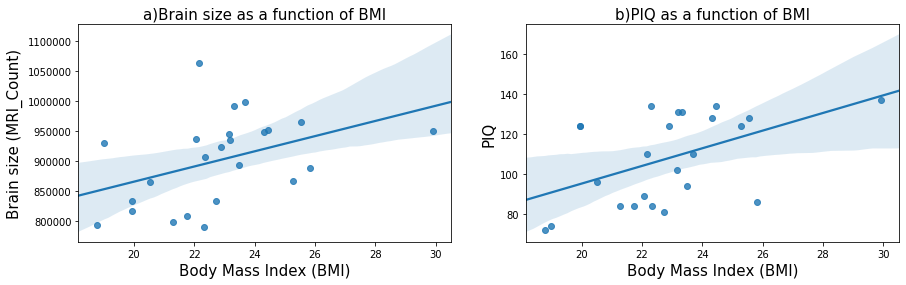

In [9]:
#Now, lets keep the data of interest: High partY score.
#We are excluding 25% of individuals with low partY scores.
datakeep=data[data['partY']>25/100]

#Lets report the relationship of how the BMI is associated to PIQ for individuals with a high partY score. 
#Lets report the relationship of how the BMI is associated to brain size (MRI_Count) for individuals with a high partY score. 
model = smf.ols('BMI ~ '+ 'PIQ', data=datakeep).fit()
model2 = smf.ols('BMI ~ '+ 'MRI_Count', data=datakeep).fit()
print(model.summary())
print(model2.summary())


#Lets plot the figure.
plt.figure(2)
thisvar='MRI_Count'
plt.subplot(1,2,1)
sns.regplot(datakeep['BMI'], datakeep[thisvar])
plt.title( 'a)'+ 'Brain size' +' as a function of BMI', fontsize=15)
plt.xlabel('Body Mass Index (BMI)', fontsize=15)
plt.ylabel('Brain size ('+thisvar+')', fontsize=15)


thisvar2='PIQ'
plt.subplot(1,2,2)
sns.regplot(datakeep['BMI'], datakeep[thisvar2])
plt.title( 'b)'+ thisvar2 + ' as a function of BMI', fontsize=15)
plt.xlabel('Body Mass Index (BMI)', fontsize=15)
plt.ylabel('PIQ', fontsize=15)

plt.subplots_adjust(left=0.1, right=2)


Both relationships, brain size as a function of BMI and PIQ as a function of BMI are significant (p<0.05) when only investigating socially active people (partY).

## Lets check the relationship using the second variable party2

In [10]:
# Lets exclude 25% of the individuals with a low party score
datakeep2=data[data['partY2']>25/100]


#Lets report the relationship of how the BMI is associated to PIQ and brain size (MRI_count) respectively, for individuals with a high partY2 score. 
thisvar='MRI_Count'
thisvar2='PIQ'

model = smf.ols('BMI ~ '+ thisvar, data=datakeep2).fit()
model2 = smf.ols('BMI ~ '+ thisvar2, data=datakeep2).fit()
print(model.summary())
print(model2.summary())

#Lets plot the figure
# plt.figure(2)

# thisvar='MRI_Count'
# plt.subplot(1,2,1)
# sns.regplot(datakeep2['BMI'], datakeep2[thisvar])
# plt.title( thisvar + ' as a function of BMI', fontsize=15)
# plt.xlabel('Body Mass Index (BMI)', fontsize=15)
# plt.ylabel('Brain size ('+thisvar+')', fontsize=15)


# thisvar='PIQ'
# plt.subplot(1,2,2)
# sns.regplot(datakeep2['BMI'], datakeep2[thisvar])
# plt.title( thisvar + ' as a function of BMI', fontsize=15)
# plt.xlabel('Body Mass Index (BMI)', fontsize=15)
# plt.ylabel('Brain size ('+thisvar+')', fontsize=15)

# plt.subplots_adjust(left=0.1, right=2)



OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.4795
Date:                Sat, 30 May 2020   Prob (F-statistic):              0.496
Time:                        22:48:08   Log-Likelihood:                -53.837
No. Observations:                  23   AIC:                             111.7
Df Residuals:                      21   BIC:                             113.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0690      8.160      2.092      0.049       0.098      34.040
M

Both relationships, brain size as a function of BMI and PIQ as a function of BMI are not significant (p>0.05) when using the second variable (partY2).